# Question 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

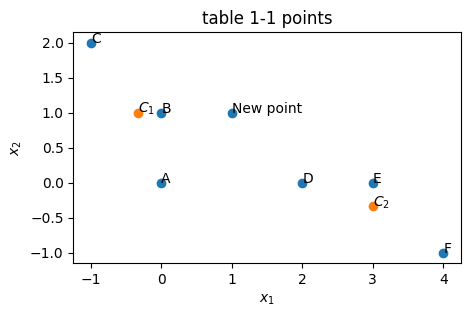

In [2]:
points = np.array([[0,0],[0,1],[-1,2],[2,0],[3,0],[4,-1],[1,1]])
centroids = np.array([[-1/3,1],[3,-1/3]])
plt.figure(figsize=(5,3))
plt.scatter(points[:,0],points[:,1])
plt.scatter(centroids[:,0],centroids[:,1])
plt.title("table 1-1 points")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
label = ['A','B','C','D','E','F', "New point"]
Center_label = ["$C_1$","$C_2$"]
for i, txt in enumerate(label):
    plt.annotate(txt, (points[i,0],points[i,1]))
for i, txt in enumerate(Center_label):
    plt.annotate(txt, (centroids[i,0],centroids[i,1]))

In [3]:
D = np.empty((6,6), dtype = int)
for i in range(6):
    for j in range(6):
        D[i][j] = int(np.linalg.norm(points[i]-points[j])**2)
D

array([[ 0,  1,  5,  4,  9, 17],
       [ 1,  0,  2,  5, 10, 20],
       [ 5,  2,  0, 12, 20, 34],
       [ 4,  5, 12,  0,  1,  5],
       [ 9, 10, 20,  1,  0,  2],
       [17, 20, 34,  5,  2,  0]])

In [4]:
a = []
for i in range(6):
    a.append(np.linalg.norm(points[i]-np.array([3.5,-0.5]))**2)
a

[12.500000000000002,
 14.500000000000002,
 26.500000000000004,
 2.5000000000000004,
 0.5000000000000001,
 0.5000000000000001]

# Question 2

## simple K-Means

### Implementaion

In [1]:
import numpy as np
from numpy.linalg import norm
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = load_iris()["data"]
data_len = data.shape[0]

In [3]:
def get_random_initials(n_k):
    init_k = np.zeros((n_k,4))
    for i in range(n_k):
        init_k[i][0] = np.random.uniform(min(data[:,0]),max(data[:,0]))
        init_k[i][1] = np.random.uniform(min(data[:,1]),max(data[:,1]))
        init_k[i][2] = np.random.uniform(min(data[:,2]),max(data[:,2]))
        init_k[i][3] = np.random.uniform(min(data[:,3]),max(data[:,3]))
    return init_k

In [4]:
def get_distances(data, K, n_k):
    distances = []
    for flower in data:
        dist = []
        for j in range(n_k):
            dist.append(norm(flower-K[j]))
        distances.append(dist)
    return distances

In [5]:
def get_cluster_assign(distances):
    cluster_assign = []
    for distance in distances:
        cluster_assign.append(np.argmin(distance))
    return cluster_assign


In [6]:
def make_new_K(data, cluster_assign, K, n_k):
    new_K = np.zeros_like(K)
    for i in range(data_len):
        new_K[cluster_assign[i]] += data[i]

    for i in range(n_k):
        if cluster_assign.count(i) == 0:
            new_K[i] = K[i]
        else:
            new_K[i] = new_K[i]/cluster_assign.count(i)
    return new_K

In [7]:
def cost_function(data,cluster_assign,K):
    all_distances = 0
    for i in range(data_len):
        all_distances +=norm(data[i]-K[cluster_assign[i]])
    return all_distances

In [8]:
def criteria(data, cluster_assign, n_k):
    inner_distance = 0
    for i in range(data_len):
        for j in range(data_len):
            if cluster_assign[i]==cluster_assign[j]:
                inner_distance += norm(data[i]-data[j])
    outer_distance = 0
    for i in range(data_len):
        for j in range(data_len):
            if cluster_assign[i]!=cluster_assign[j]:
                outer_distance += norm(data[i]-data[j])
    return inner_distance/2, outer_distance/2

In [9]:
def K_means(data, n_k, epoch=5):
    K = get_random_initials(n_k)
    cost = []
    inner_outer_distance = []
    for i in range(epoch):
        distances = get_distances(data, K, n_k)
        cluster_assign = get_cluster_assign(distances)
        cost.append(cost_function(data, cluster_assign, K))
        inner_outer_distance.append(criteria(data, cluster_assign, n_k))
        K = make_new_K(data, cluster_assign, K, n_k)
    cost.append(cost_function(data, cluster_assign, K))
    inner_outer_distance.append(criteria(data, cluster_assign, n_k))
    return cost, cluster_assign, inner_outer_distance

### Validation

In [38]:
K5_means,_, K5_criteria = K_means(data, n_k=5, epoch=20)
K10_means,_, K10_criteria = K_means(data, n_k=10, epoch=20)
K20_means,_, K20_criteria = K_means(data, n_k=20, epoch=20)

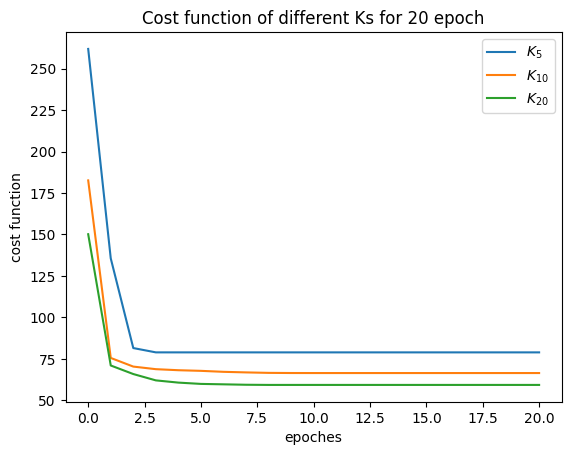

In [39]:
plt.plot(K5_means)
plt.plot(K10_means)
plt.plot(K20_means)
plt.title("Cost function of different Ks for 20 epoch")
plt.xlabel("epoches")
plt.ylabel("cost function")
plt.legend(["$K_5$","$K_{10}$","$K_{20}$"])
plt.show()

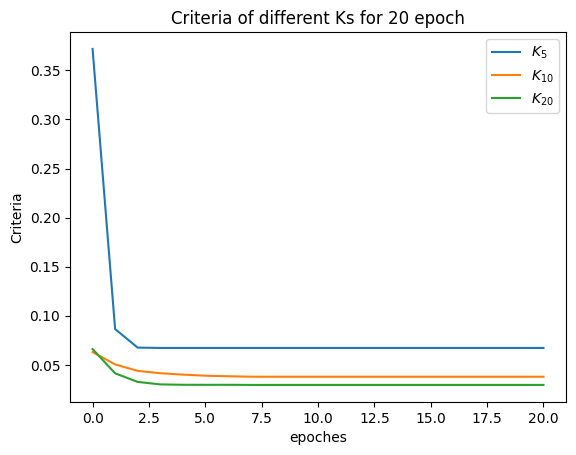

In [40]:
K5_in_out_ratio = [K5_criteria[i][0]/K5_criteria[i][1] for i in range(21)]
K10_in_out_ratio = [K10_criteria[i][0]/K10_criteria[i][1] for i in range(21)]
K20_in_out_ratio = [K20_criteria[i][0]/K20_criteria[i][1] for i in range(21)]
plt.plot(K5_in_out_ratio)
plt.plot(K10_in_out_ratio)
plt.plot(K20_in_out_ratio)
plt.title("Criteria of different Ks for 20 epoch")
plt.xlabel("epoches")
plt.ylabel("Criteria")
plt.legend(["$K_5$","$K_{10}$","$K_{20}$"])
plt.show()

#### Ratio

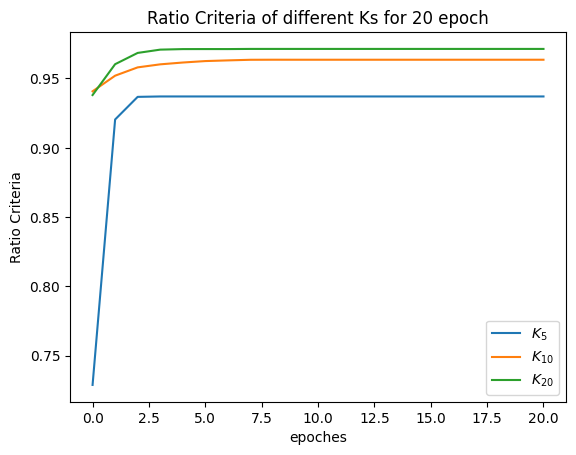

In [41]:
K5_ratio = [K5_criteria[i][1]/(K5_criteria[i][0]+K5_criteria[i][1]) for i in range(21)]
K10_ratio = [K10_criteria[i][1]/(K10_criteria[i][0]+K10_criteria[i][1]) for i in range(21)]
K20_ratio = [K20_criteria[i][1]/(K20_criteria[i][0]+K20_criteria[i][1]) for i in range(21)]
plt.plot(K5_ratio)
plt.plot(K10_ratio)
plt.plot(K20_ratio)
plt.title("Ratio Criteria of different Ks for 20 epoch")
plt.xlabel("epoches")
plt.ylabel("Ratio Criteria")
plt.legend(["$K_5$","$K_{10}$","$K_{20}$"])
plt.show()

In [42]:
K5_cost_mean = np.array(K5_means).mean()
K5_cost_var = np.array(K5_means).var()
K10_cost_mean = np.array(K10_means).mean()
K10_cost_var = np.array(K10_means).var()
K20_cost_mean = np.array(K20_means).mean()
K20_cost_var = np.array(K20_means).var()
print(f"for K = 5 cost mean is: {K5_cost_mean:0.2f} and cost variance is: {K5_cost_var:0.2f}")
print(f"for K = 10 cost mean is: {K10_cost_mean:0.2f} and cost variance is: {K10_cost_var:0.2f}")
print(f"for K = 20 cost mean is: {K20_cost_mean:0.2f} and cost variance is: {K20_cost_var:0.2f}")

K5_Ratio_mean = np.array(K5_ratio).mean()
K5_Ratio_var = np.array(K5_ratio).var()
K10_Ratio_mean = np.array(K10_ratio).mean()
K10_Ratio_var = np.array(K10_ratio).var()
K20_Ratio_mean = np.array(K20_ratio).mean()
K20_Ratio_var = np.array(K20_ratio).var()
print(f"\nfor K = 5 Ratio mean is: {K5_Ratio_mean:0.3f} and Ratio variance is: {K5_Ratio_var:0.5f}")
print(f"for K = 10 Ratio mean is: {K10_Ratio_mean:0.3f} and Ratio variance is: {K10_Ratio_var:0.5f}")
print(f"for K = 20 Ratio mean is: {K20_Ratio_mean:0.3f} and Ratio variance is: {K20_Ratio_var:0.5f}")

for K = 5 cost mean is: 90.44 and cost variance is: 1613.94
for K = 10 cost mean is: 72.91 and cost variance is: 605.74
for K = 20 cost mean is: 64.73 and cost variance is: 372.45

for K = 5 Ratio mean is: 0.926 and Ratio variance is: 0.00196
for K = 10 Ratio mean is: 0.961 and Ratio variance is: 0.00003
for K = 20 Ratio mean is: 0.969 and Ratio variance is: 0.00005


## Smart K-Means

### Implementation

In [10]:
def get_cluster_assign_smart(distances, cluster_assign_smart):
    for i in range(len(distances)):
        const_for_i = Constraints[Constraints["Index2"]==i]
        if const_for_i.shape[0] == 0:
            cluster_assign_smart[i] = np.argmin(distances[i])
        else:
            apply_constraints(distances, const_for_i, i, cluster_assign_smart)
    return cluster_assign_smart

In [11]:
def apply_constraints(distances, const_for_i, i, cluster_assign_smart):
    if const_for_i.shape[0] == 1: # datapiont has 1 constraint
        second_datapoint = const_for_i.iloc[0].Index1
        if const_for_i.iloc[0].Relation == 1:# Relation: 1
            cluster_assign_smart[i] = np.argmin(distances[second_datapoint])
        else: # Relation: -1
            if np.argmin(distances[second_datapoint]) == np.argmin(distances[i]):
                cluster_assign_smart[i] = np.argpartition(distances[i], 2)[1]
            else:
                cluster_assign_smart[i] = np.argmin(distances[i])
                
    else: # datapiont has more constraint
        second_datapoint = const_for_i.iloc[0].Index1
        third_datapoint = const_for_i.iloc[1].Index1

        if const_for_i.iloc[0].Relation == 1:  # first Relation: 1
            if np.argmin(distances[third_datapoint]) == np.argmin(distances[i]): # second Relation -1
                cluster_assign_smart[i] = np.argpartition(distances[i], 2)[1]
            else:
                cluster_assign_smart[i] = np.argmin(distances[i]) 
            cluster_assign_smart[second_datapoint] = cluster_assign_smart[i]

        else: # first Relation: -1
            if np.argmin(distances[second_datapoint]) == np.argmin(distances[i]) or np.argmin(distances[third_datapoint]) == np.argmin(distances[i]):
                if np.argmin(distances[second_datapoint]) == np.argpartition(distances[i], 2)[1] or np.argmin(distances[third_datapoint]) == np.argpartition(distances[i], 2)[1]:
                    cluster_assign_smart[i] = np.argpartition(distances[i], 2)[2]
                else:
                    cluster_assign_smart[i] = np.argpartition(distances[i], 2)[1]
            else:
                cluster_assign_smart[i] = np.argmin(distances[i])
                




In [12]:
def K_means_smart(data, n_k, epoch=5):
    K = get_random_initials(n_k)
    cost = []
    inner_outer_distance = []
    for i in range(epoch):
        cluster_assign_smart = [0]*data_len
        distances = get_distances(data, K, n_k)
        cluster_assign = get_cluster_assign_smart(distances, cluster_assign_smart)
        cost.append(cost_function(data, cluster_assign, K))
        inner_outer_distance.append(criteria(data, cluster_assign, n_k))
        K = make_new_K(data, cluster_assign, K, n_k)
    cost.append(cost_function(data, cluster_assign, K))
    inner_outer_distance.append(criteria(data, cluster_assign, n_k))
    return cost, cluster_assign_smart, inner_outer_distance

In [13]:
Constraints = pd.read_csv("Constraint.txt", sep="\t")
Constraints20 = Constraints.iloc[0:20].copy()
Constraints40 = Constraints.iloc[10:50].copy()
Constraints60 = Constraints.copy()

### Validation

In [20]:
Constraints = Constraints20
K5_C20_means,_, K5_C20_criteria = K_means_smart(data, n_k=5, epoch=10)
K10_C20_means,_, K10_C20_criteria = K_means_smart(data, n_k=10, epoch=10)
K20_C20_means,_, K20_C20_criteria = K_means_smart(data, n_k=20, epoch=10)
Constraints = Constraints40
K5_C40_means,_, K5_C40_criteria = K_means_smart(data, n_k=5, epoch=10)
K10_C40_means,_, K10_C40_criteria = K_means_smart(data, n_k=10, epoch=10)
K20_C40_means,_, K20_C40_criteria = K_means_smart(data, n_k=20, epoch=10)
Constraints = Constraints60
K5_C60_means,_, K5_C60_criteria = K_means_smart(data, n_k=5, epoch=10)
K10_C60_means,_, K10_C60_criteria = K_means_smart(data, n_k=10, epoch=10)
K20_C60_means,_, K20_C60_criteria = K_means_smart(data, n_k=20, epoch=10)

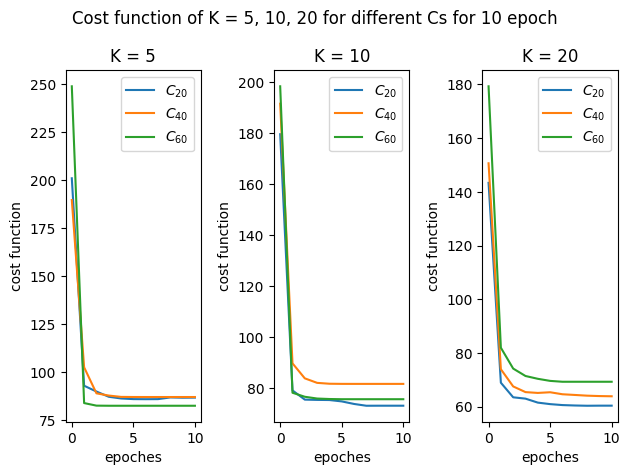

In [29]:
fig = plt.figure()
ax1 = fig.add_subplot(131)
plt.plot(K5_C20_means)
plt.plot(K5_C40_means)
plt.plot(K5_C60_means)
plt.title("K = 5")
plt.xlabel("epoches")
plt.ylabel("cost function")
plt.legend(["$C_{20}$","$C_{40}$","$C_{60}$"])
ax2 = fig.add_subplot(132)
plt.plot(K10_C20_means)
plt.plot(K10_C40_means)
plt.plot(K10_C60_means)
plt.title("K = 10")
plt.xlabel("epoches")
plt.ylabel("cost function")
plt.legend(["$C_{20}$","$C_{40}$","$C_{60}$"])
ax3 = fig.add_subplot(133)
plt.plot(K20_C20_means)
plt.plot(K20_C40_means)
plt.plot(K20_C60_means)
plt.title("K = 20")
plt.xlabel("epoches")
plt.ylabel("cost function")
plt.legend(["$C_{20}$","$C_{40}$","$C_{60}$"])
plt.suptitle('Cost function of K = 5, 10, 20 for different Cs for 10 epoch')
plt.tight_layout()

plt.show()

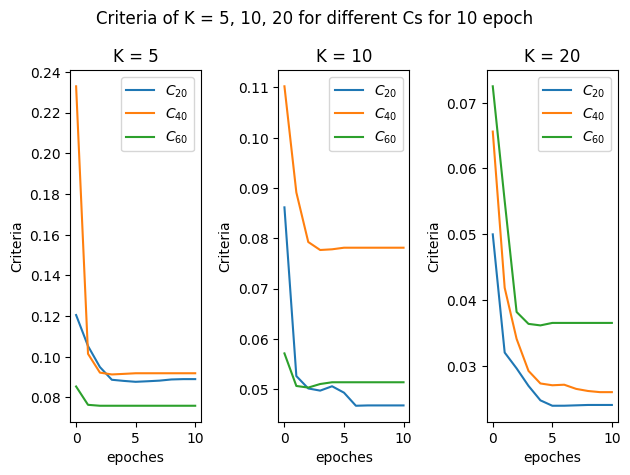

In [28]:
K5_C20_in_out_ratio = [K5_C20_criteria[i][0]/K5_C20_criteria[i][1] for i in range(11)]
K5_C40_in_out_ratio = [K5_C40_criteria[i][0]/K5_C40_criteria[i][1] for i in range(11)]
K5_C60_in_out_ratio = [K5_C60_criteria[i][0]/K5_C60_criteria[i][1] for i in range(11)]

K10_C20_in_out_ratio = [K10_C20_criteria[i][0]/K10_C20_criteria[i][1] for i in range(11)]
K10_C40_in_out_ratio = [K10_C40_criteria[i][0]/K10_C40_criteria[i][1] for i in range(11)]
K10_C60_in_out_ratio = [K10_C60_criteria[i][0]/K10_C60_criteria[i][1] for i in range(11)]

K20_C20_in_out_ratio = [K20_C20_criteria[i][0]/K20_C20_criteria[i][1] for i in range(11)]
K20_C40_in_out_ratio = [K20_C40_criteria[i][0]/K20_C40_criteria[i][1] for i in range(11)]
K20_C60_in_out_ratio = [K20_C60_criteria[i][0]/K20_C60_criteria[i][1] for i in range(11)]

fig = plt.figure()
ax1 = fig.add_subplot(131)
plt.plot(K5_C20_in_out_ratio)
plt.plot(K5_C40_in_out_ratio)
plt.plot(K5_C60_in_out_ratio)
plt.title("K = 5")
plt.xlabel("epoches")
plt.ylabel("Criteria")
plt.legend(["$C_{20}$","$C_{40}$","$C_{60}$"])
ax2 = fig.add_subplot(132)
plt.plot(K10_C20_in_out_ratio)
plt.plot(K10_C40_in_out_ratio)
plt.plot(K10_C60_in_out_ratio)
plt.title("K = 10")
plt.xlabel("epoches")
plt.ylabel("Criteria")
plt.legend(["$C_{20}$","$C_{40}$","$C_{60}$"])
ax3 = fig.add_subplot(133)
plt.plot(K20_C20_in_out_ratio)
plt.plot(K20_C40_in_out_ratio)
plt.plot(K20_C60_in_out_ratio)
plt.title("K = 20")
plt.xlabel("epoches")
plt.ylabel("Criteria")
plt.legend(["$C_{20}$","$C_{40}$","$C_{60}$"])
plt.suptitle('Criteria of K = 5, 10, 20 for different Cs for 10 epoch')
plt.tight_layout()
plt.show()

#### Ratio

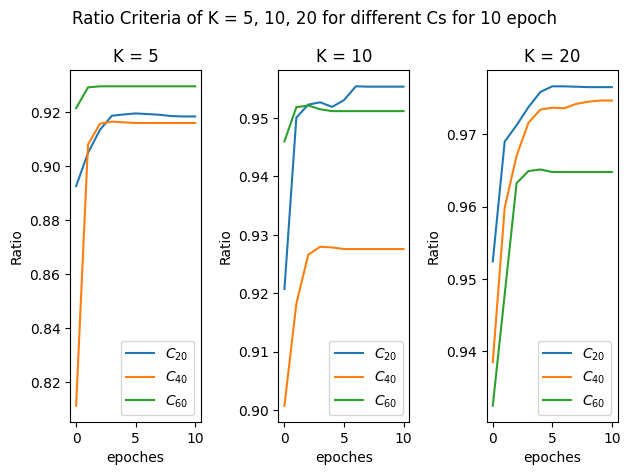

In [31]:
K5_C20_ratio = [K5_C20_criteria[i][1]/(K5_C20_criteria[i][0]+K5_C20_criteria[i][1]) for i in range(11)]
K5_C40_ratio = [K5_C40_criteria[i][1]/(K5_C40_criteria[i][0]+K5_C40_criteria[i][1]) for i in range(11)]
K5_C60_ratio = [K5_C60_criteria[i][1]/(K5_C60_criteria[i][0]+K5_C60_criteria[i][1]) for i in range(11)]

K10_C20_ratio = [K10_C20_criteria[i][1]/(K10_C20_criteria[i][0]+K10_C20_criteria[i][1]) for i in range(11)]
K10_C40_ratio = [K10_C40_criteria[i][1]/(K10_C40_criteria[i][0]+K10_C40_criteria[i][1]) for i in range(11)]
K10_C60_ratio = [K10_C60_criteria[i][1]/(K10_C60_criteria[i][0]+K10_C60_criteria[i][1]) for i in range(11)]

K20_C20_ratio = [K20_C20_criteria[i][1]/(K20_C20_criteria[i][0]+K20_C20_criteria[i][1]) for i in range(11)]
K20_C40_ratio = [K20_C40_criteria[i][1]/(K20_C40_criteria[i][0]+K20_C40_criteria[i][1]) for i in range(11)]
K20_C60_ratio = [K20_C60_criteria[i][1]/(K20_C60_criteria[i][0]+K20_C60_criteria[i][1]) for i in range(11)]


fig = plt.figure()
ax1 = fig.add_subplot(131)
plt.plot(K5_C20_ratio)
plt.plot(K5_C40_ratio)
plt.plot(K5_C60_ratio)
plt.title("K = 5")
plt.xlabel("epoches")
plt.ylabel("Ratio")
plt.legend(["$C_{20}$","$C_{40}$","$C_{60}$"])
ax2 = fig.add_subplot(132)
plt.plot(K10_C20_ratio)
plt.plot(K10_C40_ratio)
plt.plot(K10_C60_ratio)
plt.title("K = 10")
plt.xlabel("epoches")
plt.ylabel("Ratio")
plt.legend(["$C_{20}$","$C_{40}$","$C_{60}$"])
ax3 = fig.add_subplot(133)
plt.plot(K20_C20_ratio)
plt.plot(K20_C40_ratio)
plt.plot(K20_C60_ratio)
plt.title("K = 20")
plt.xlabel("epoches")
plt.ylabel("Ratio")
plt.legend(["$C_{20}$","$C_{40}$","$C_{60}$"])
plt.suptitle('Ratio Criteria of K = 5, 10, 20 for different Cs for 10 epoch')
plt.tight_layout()
plt.show()

### K = 3

In [95]:
target = load_iris()["target"]

In [166]:
K3_means,K3_clusters, K3_criteria = K_means(data, n_k=3, epoch=10)
K3_means_smart,K3_clusters_smart, K3_criteria_smart = K_means_smart(data, n_k=3, epoch=10)

In [167]:
np.array(K3_clusters)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [168]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [169]:
K3_clusters = pd.Series(K3_clusters)
first_idex = K3_clusters.iloc[:20].mode()[0]
second_idex = K3_clusters.iloc[60:90].mode()[0]
third_idex = K3_clusters.iloc[-20:].mode()[0]

K3_clusters.replace([first_idex,second_idex,third_idex],[0,1,2], inplace=True)
eval_df = pd.DataFrame({'target': target, 'Predictions': K3_clusters})
accuracy = eval_df[eval_df['target']==eval_df['Predictions']].shape[0]/eval_df.shape[0]
print(f"Accuract: {accuracy*100:0.2f} %")

Accuract: 88.67 %


In [170]:
K3_clusters_smart = pd.Series(K3_clusters_smart)
first_idex = K3_clusters_smart.iloc[:20].mode()[0]
second_idex = K3_clusters_smart.iloc[60:90].mode()[0]
third_idex = K3_clusters_smart.iloc[-20:].mode()[0]
K3_clusters_smart.replace([first_idex,second_idex,third_idex],[0,1,2], inplace=True)
eval_df = pd.DataFrame({'target': target, 'Predictions': K3_clusters_smart})
accuracy = eval_df[eval_df['target']==eval_df['Predictions']].shape[0]/eval_df.shape[0]
print(f"Accuract: {accuracy*100:0.2f} %")

Accuract: 87.33 %
